In [1]:
#importamos librerias 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#cargar archivo csv
df=pd.read_csv('Mexico_City_Limpio.csv')
#eliminamos la columna unnamed 
df= df.drop(['Unnamed: 0'], axis=1)
df.head(5)

,last_scraped,source,description,neighborhood_overview,host_name,host_since,host_response_time,host_is_superhost,host_neighbourhood,host_verifications,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,9/25/2024,city scrape,"Dentro de Villa un estudio de arte con futon, ...","Santa Fe Mall, Interloma Park and the Lion Des...",Dici,6/28/2010,a few days or more,f,Unknown,"['email', 'phone', 'work_email']",...,4.80,4.80,4.80,4.80,4.70,1.0,1.0,0.0,0.0,0.00
1,9/26/2024,previous scrape,A new concept of hosting in mexico through a b...,No overview available,Fernando,8/9/2010,within an hour,t,Condesa,"['email', 'phone', 'work_email']",...,4.70,4.87,4.78,4.98,4.48,8.0,4.0,1.0,0.0,0.41
2,9/26/2024,city scrape,"Comfortably furnished, sunny, 2 bedroom apt., ...",No overview available,Nicholas,1/4/2011,within an hour,t,HipÃ³dromo,"['email', 'phone']",...,4.75,4.94,4.92,4.98,4.91,2.0,2.0,0.0,0.0,0.31
3,9/25/2024,city scrape,COYOACAN designer studio quiet & safe! well eq...,Coyoacan is a beautiful neighborhood famous fo...,Trisha,8/24/2010,within a few hours,t,CoyoacÃ¡n,"['email', 'phone', 'work_email']",...,4.96,4.96,4.98,4.96,4.92,3.0,2.0,1.0,0.0,0.83
4,9/25/2024,city scrape,Is the best ever place triple L <br />Location...,"Is located in the best area of Mexico City, Po...",Andrea,4/27/2011,within an hour,t,Polanco,"['email', 'phone']",...,5.00,5.00,4.73,4.91,4.82,3.0,3.0,0.0,0.0,0.11


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10523 entries, 0 to 10522
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  10523 non-null  object 
 1   source                                        10523 non-null  object 
 2   description                                   10523 non-null  object 
 3   neighborhood_overview                         10523 non-null  object 
 4   host_name                                     10523 non-null  object 
 5   host_since                                    10523 non-null  object 
 6   host_response_time                            10523 non-null  object 
 7   host_is_superhost                             10523 non-null  object 
 8   host_neighbourhood                            10523 non-null  object 
 9   host_verifications                            10523 non-null 

In [4]:
#f1=df.iloc[ :  , [8,9,10,13,14,20,21,24,25,26,28,40,44,45,49] ]
f1=df

In [6]:
f1['location_id'] = f1['latitude'] + f1['longitude']

In [7]:
f1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10523 entries, 0 to 10522
Data columns (total 51 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  10523 non-null  object 
 1   source                                        10523 non-null  object 
 2   description                                   10523 non-null  object 
 3   neighborhood_overview                         10523 non-null  object 
 4   host_name                                     10523 non-null  object 
 5   host_since                                    10523 non-null  object 
 6   host_response_time                            10523 non-null  object 
 7   host_is_superhost                             10523 non-null  object 
 8   host_neighbourhood                            10523 non-null  object 
 9   host_verifications                            10523 non-null 

In [8]:
#convertimos las variables de tipo object a tipo numérico 
f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})
#f1['host_identity_verified'] = f1['host_identity_verified'].replace({'f': 0, 't': 1})
#f1['instant_bookable'] = f1['instant_bookable'].replace({'f': 0, 't': 1})
#frecuencias = f1['property_type'].value_counts()
#f1['property_type'] = f1['property_type'].map(frecuencias)
#print(f1[['property_type']])


f1['host_acceptance_rate'] = f1['host_acceptance_rate'].astype(str).str.rstrip('%')
f1['host_acceptance_rate'] = pd.to_numeric(f1['host_acceptance_rate'], errors='coerce').fillna(0)

f1['room_type'] = f1['room_type'].map({
    'Entire home/apt': 1,
    'Private room': 2,
    'Shared room': 3,
    'Hotel room': 4
})

f1['price'] = f1['price'].astype(str).str.rstrip('$')
f1['price'] = pd.to_numeric(f1['price'], errors='coerce').fillna(0)

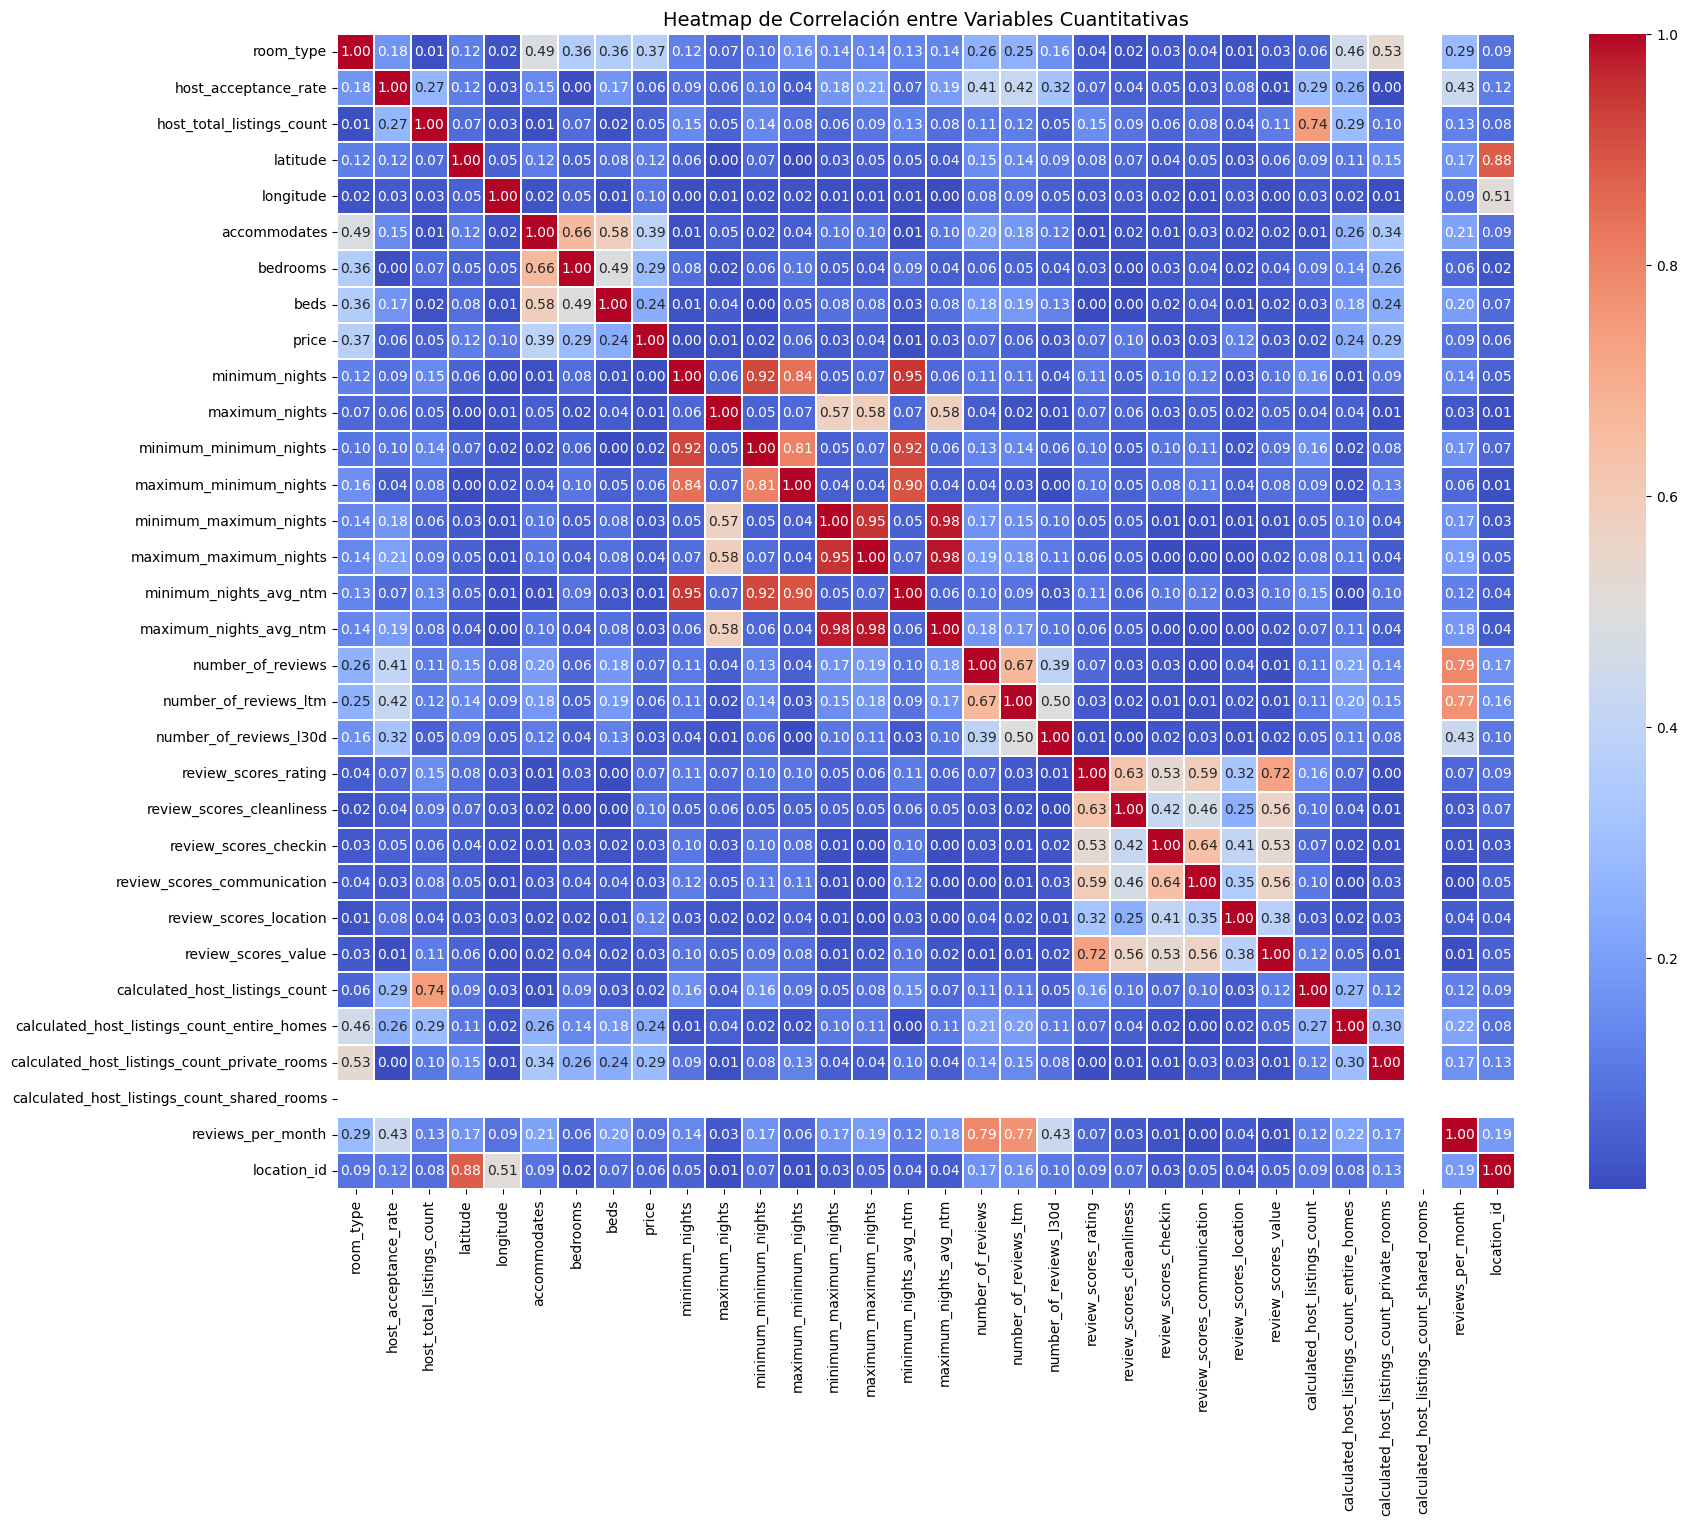

In [9]:
df_numeric = f1.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
corr_matrix = df_numeric.corr()
corr_matrix2= abs(corr_matrix)

# Crear el heatmap
plt.figure(figsize=(19, 15))  # Ajusta el tamaño
sns.heatmap(corr_matrix2, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.10)

# Configurar el título
plt.title("Heatmap de Correlación entre Variables Cuantitativas", fontsize=14)

# Mostrar la gráfica
plt.show()

**Graficas**

<Axes: xlabel='number_of_reviews', ylabel='location_id'>

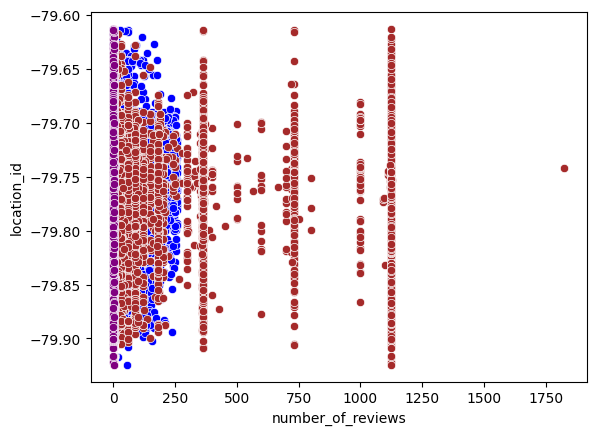

In [11]:
from turtle import color


sns.scatterplot(x='number_of_reviews', y='location_id', color="blue", data=f1)
sns.scatterplot(x='review_scores_cleanliness', y='location_id', color="red", data=f1)
sns.scatterplot(x='maximum_nights', y='location_id', color="brown", data=f1)
sns.scatterplot(x='review_scores_communication', y='location_id', color="pink", data=f1)
sns.scatterplot(x='reviews_per_month', y='location_id', color="purple", data=f1)

In [12]:
# Convertir 't' a 1 y 'unavailable' a 0
f1['has_availability'] = f1['has_availability'].map({'t': 1, 'unavailable': 0})

# Reemplazar valores NaN con 0 y convertir a enteros
f1['has_availability'] = f1['has_availability'].fillna(0).astype(int)

# Verificar los primeros valores después de la conversión
print(f1['has_availability'].head())

0    1
1    1
2    1
3    1
4    1
Name: has_availability, dtype: int64


<Axes: xlabel='host_is_superhost', ylabel='host_acceptance_rate'>

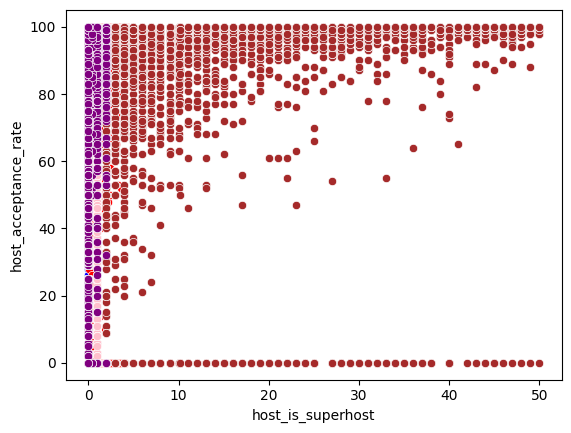

In [13]:
from turtle import color


sns.scatterplot(x='host_is_superhost', y='host_acceptance_rate', color="blue", data=f1)
sns.scatterplot(x='reviews_per_month', y='host_acceptance_rate', color="red", data=f1)
sns.scatterplot(x='number_of_reviews_ltm', y='host_acceptance_rate', color="brown", data=f1)
sns.scatterplot(x='has_availability', y='host_acceptance_rate', color="pink", data=f1)
sns.scatterplot(x='number_of_reviews_l30d', y='host_acceptance_rate', color="purple", data=f1)

<Axes: xlabel='number_of_reviews_ltm', ylabel='host_is_superhost'>

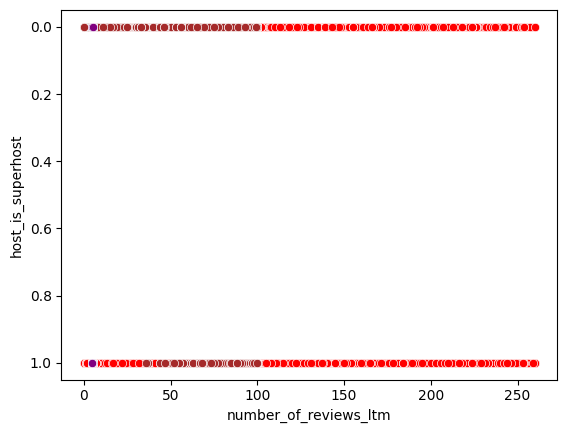

In [14]:
from turtle import color


sns.scatterplot(x='number_of_reviews_ltm', y='host_is_superhost', color="blue", data=f1)
sns.scatterplot(x='number_of_reviews', y='host_is_superhost', color="red", data=f1)
sns.scatterplot(x='host_acceptance_rate', y='host_is_superhost', color="brown", data=f1)
sns.scatterplot(x='review_scores_rating', y='host_is_superhost', color="pink", data=f1)
sns.scatterplot(x='review_scores_value', y='host_is_superhost', color="purple", data=f1)

<Axes: xlabel='room_type', ylabel='calculated_host_listings_count'>

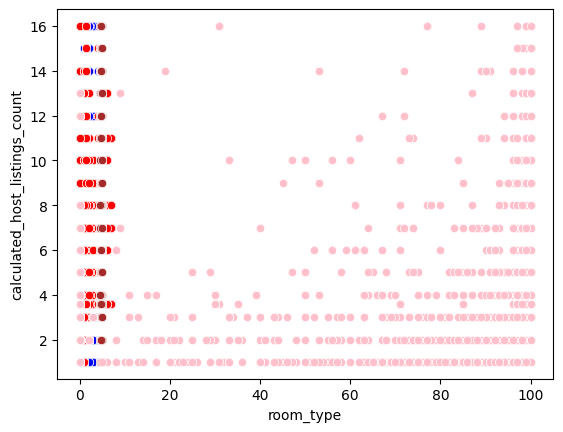

In [15]:
from turtle import color


sns.scatterplot(x='room_type', y='calculated_host_listings_count', color="blue", data=f1)
sns.scatterplot(x='calculated_host_listings_count_entire_homes', y='calculated_host_listings_count', color="red", data=f1)
sns.scatterplot(x='review_scores_value', y='calculated_host_listings_count', color="brown", data=f1)
sns.scatterplot(x='host_acceptance_rate', y='calculated_host_listings_count', color="pink", data=f1)


<Axes: xlabel='price', ylabel='room_type'>

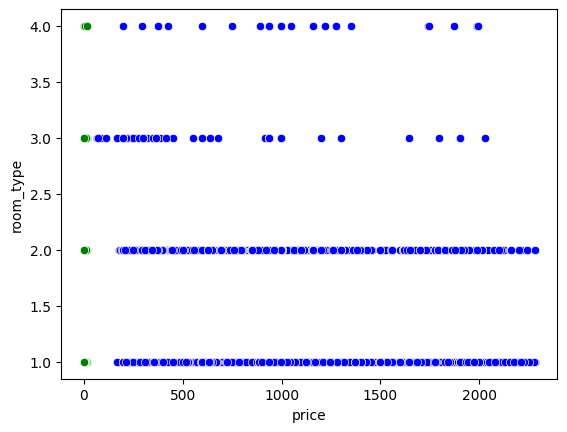

In [16]:
from turtle import color


sns.scatterplot(x='price', y='room_type', color="blue", data=f1)
sns.scatterplot(x='accommodates', y='room_type', color="red", data=f1)
sns.scatterplot(x='bedrooms', y='room_type', color="brown", data=f1)
sns.scatterplot(x='calculated_host_listings_count_entire_homes', y='room_type', color="pink", data=f1)
sns.scatterplot(x='beds', y='room_type', color="purple", data=f1)
sns.scatterplot(x='calculated_host_listings_count', y='room_type', color="green", data=f1)

<Axes: xlabel='bedrooms', ylabel='accommodates'>

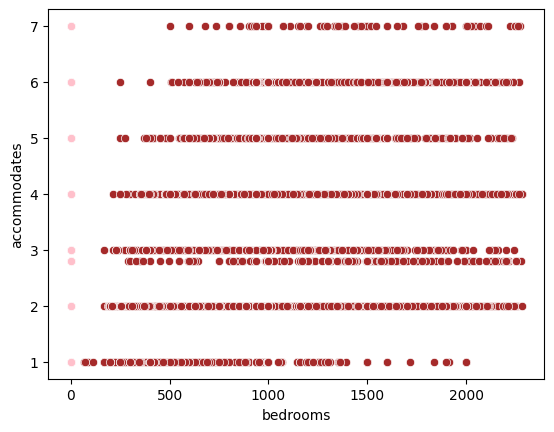

In [17]:
from turtle import color


sns.scatterplot(x='bedrooms', y='accommodates', color="blue", data=f1)
sns.scatterplot(x='beds', y='accommodates', color="red", data=f1)
sns.scatterplot(x='price', y='accommodates', color="brown", data=f1)
sns.scatterplot(x='room_type', y='accommodates', color="pink", data=f1)

<Axes: xlabel='price', ylabel='bedrooms'>

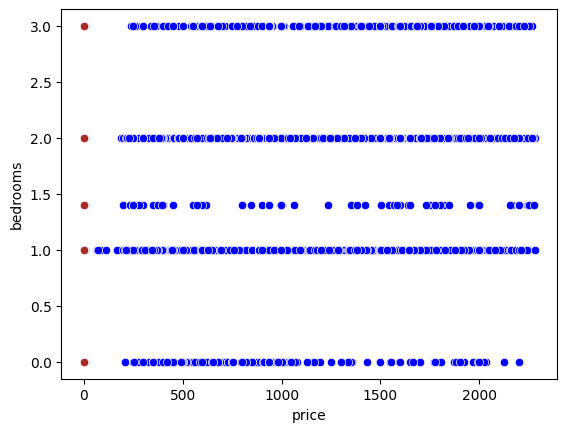

In [18]:
from turtle import color

sns.scatterplot(x='price', y='bedrooms', color="blue", data=f1)
sns.scatterplot(x='accommodates', y='bedrooms', color="red", data=f1)
sns.scatterplot(x='beds', y='bedrooms', color="brown", data=f1)

<Axes: xlabel='accommodates', ylabel='price'>

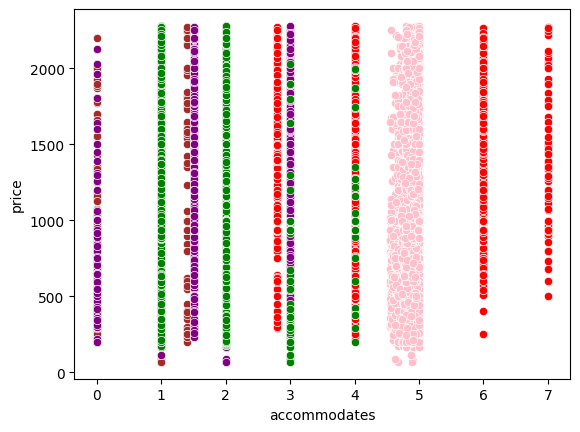

In [19]:
from turtle import color

sns.scatterplot(x='accommodates', y='price', color="red", data=f1)
sns.scatterplot(x='bedrooms', y='price', color="brown", data=f1)
sns.scatterplot(x='review_scores_location', y='price', color="pink", data=f1)
sns.scatterplot(x='beds', y='price', color="purple", data=f1)
sns.scatterplot(x='room_type', y='price', color="green", data=f1)

<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_value'>

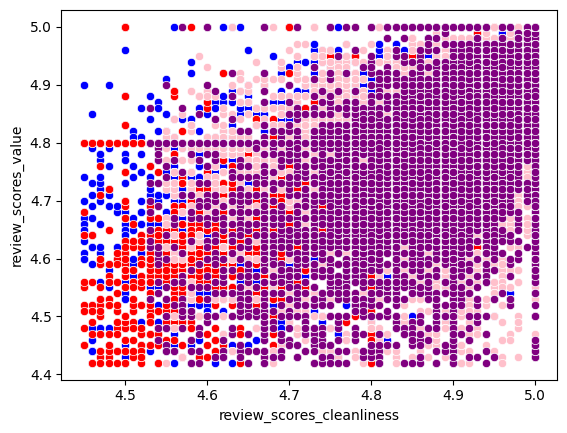

In [20]:
from turtle import color

sns.scatterplot(x='review_scores_cleanliness', y='review_scores_value', color="blue", data=f1)
sns.scatterplot(x='review_scores_rating', y='review_scores_value', color="red", data=f1)
sns.scatterplot(x='review_scores_location', y='review_scores_value', color="pink", data=f1)
sns.scatterplot(x='review_scores_communication', y='review_scores_value', color="purple", data=f1)


<Axes: xlabel='number_of_reviews', ylabel='reviews_per_month'>

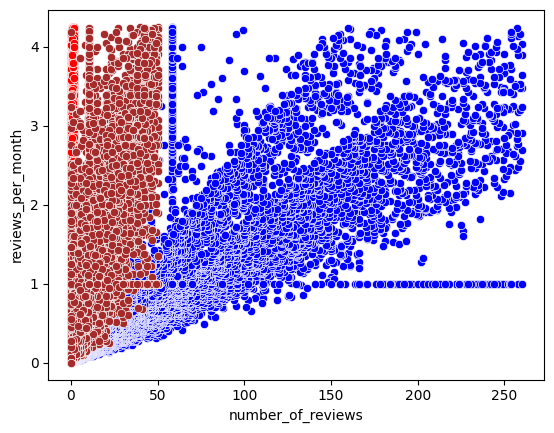

In [21]:
from turtle import color

sns.scatterplot(x='number_of_reviews', y='reviews_per_month', color="blue", data=f1)
sns.scatterplot(x='number_of_reviews_l30d', y='reviews_per_month', color="red", data=f1)
sns.scatterplot(x='number_of_reviews_ltm', y='reviews_per_month', color="brown", data=f1)

**DECLARACIÓN DE VARIABLES DEPENDIENTES E INDEPENDIENTES**

In [22]:
#declaración de las variables independientes que se van a comparar con cada variable dependiente asignada 
Vars_Indep= f1[['number_of_reviews', 'review_scores_cleanliness', 'maximum_nights', 'review_scores_communication', 'reviews_per_month']]
Vars_Indep2=f1[['host_is_superhost', 'reviews_per_month', 'number_of_reviews_ltm', 'number_of_reviews_l30d']]
Vars_Indep3=f1[['number_of_reviews_ltm','number_of_reviews','host_acceptance_rate','review_scores_rating', 'review_scores_value', 'reviews_per_month']]
Vars_Indep4=f1[['room_type','calculated_host_listings_count_entire_homes', 'review_scores_value', 'host_acceptance_rate']]
Vars_Indep5=f1[['price', 'accommodates', 'bedrooms', 'calculated_host_listings_count_entire_homes', 'beds', 'calculated_host_listings_count']]
Vars_Indep6=f1[['bedrooms', 'beds', 'price', 'room_type']]
Vars_Indep7=f1[['accommodates', 'beds', 'price']]
Vars_Indep8=f1[['accommodates', 'bedrooms', 'review_scores_location', 'beds', 'room_type']]
Vars_Indep9=f1[['review_scores_cleanliness', 'review_scores_rating', 'review_scores_location', 'review_scores_communication']]
Vars_Indep10=f1[['number_of_reviews','number_of_reviews_l30d', 'number_of_reviews_ltm']]


In [23]:
#Declaración de variables dependientes
Var_Dep= f1['location_id']
Var_Dep2= f1['host_acceptance_rate']
Var_Dep3= f1['host_is_superhost']
Var_Dep4= f1['calculated_host_listings_count']
Var_Dep5= f1['room_type']
Var_Dep6= f1['accommodates']
Var_Dep7= f1['bedrooms']
Var_Dep8= f1['price']
Var_Dep9= f1['review_scores_value']
Var_Dep10= f1['reviews_per_month']

In [24]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model2=LinearRegression()
model3= LinearRegression()
model4=LinearRegression()
model5= LinearRegression()
model6=LinearRegression()
model7= LinearRegression()
model8=LinearRegression()
model9= LinearRegression()
model10=LinearRegression()

In [25]:
#Verificamos la función relacionada al modelo
type(model)
type(model2)
type(model3)
type(model4)
type(model5)
type(model6)
type(model7)
type(model8)
type(model9)
type(model10)

sklearn.linear_model._base.LinearRegression

In [26]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)
model2.fit(X=Vars_Indep2, y=Var_Dep2)
model3.fit(X=Vars_Indep3, y=Var_Dep3)
model4.fit(X=Vars_Indep4, y=Var_Dep4)
model5.fit(X=Vars_Indep5, y=Var_Dep5)
model6.fit(X=Vars_Indep6, y=Var_Dep6)
model7.fit(X=Vars_Indep7, y=Var_Dep7)
model8.fit(X=Vars_Indep8, y=Var_Dep8)
model9.fit(X=Vars_Indep9, y=Var_Dep9)
model10.fit(X=Vars_Indep10, y=Var_Dep10)

LinearRegression()

In [27]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews', 'review_scores_cleanliness', 'maximum_nights',
        'review_scores_communication', 'reviews_per_month'], dtype=object),
 'n_features_in_': 5,
 'coef_': array([ 3.30835156e-05, -2.13559530e-02, -1.72311609e-06, -9.44695671e-03,
         6.77703301e-03]),
 'rank_': 5,
 'singular_': array([5.00302832e+04, 6.31633433e+03, 6.45828781e+01, 1.43607952e+01,
        8.34650555e+00]),
 'intercept_': np.float64(-79.62546686232486)}

In [28]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.04244738657293179

In [29]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost', 'reviews_per_month', 'number_of_reviews_ltm',
        'number_of_reviews_l30d'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([25.18891401,  8.40257209,  0.33061931,  6.49533482]),
 'rank_': 4,
 'singular_': array([1312.7142836 ,   68.01702576,   55.23840629,   44.68880463]),
 'intercept_': np.float64(50.03984653462362)}

In [30]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model2.score(Vars_Indep2,Var_Dep2)

0.29538598928634674

In [31]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model3.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews_ltm', 'number_of_reviews',
        'host_acceptance_rate', 'review_scores_rating',
        'review_scores_value', 'reviews_per_month'], dtype=object),
 'n_features_in_': 6,
 'coef_': array([6.32687591e-03, 4.70050373e-04, 3.98596683e-03, 8.88436497e-01,
        1.12356347e-01, 7.46531954e-03]),
 'rank_': 6,
 'singular_': array([6710.82011622, 3604.96146972,  943.62754814,   54.45635828,
          17.26839138,    6.84946072]),
 'intercept_': np.float64(-4.869108948507028)}

In [32]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model3.score(Vars_Indep3,Var_Dep3)

0.2896190685469403

In [33]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model4.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['room_type', 'calculated_host_listings_count_entire_homes',
        'review_scores_value', 'host_acceptance_rate'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([ 1.48797141,  0.69834272, -2.84366558,  0.02059232]),
 'rank_': 4,
 'singular_': array([4152.28956648,  152.85622145,   50.08086793,   13.48008594]),
 'intercept_': np.float64(12.654171920232653)}

In [35]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model4.score(Vars_Indep4,Var_Dep4)

0.18222690583474943

In [36]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model5.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['price', 'accommodates', 'bedrooms',
        'calculated_host_listings_count_entire_homes', 'beds',
        'calculated_host_listings_count'], dtype=object),
 'n_features_in_': 6,
 'coef_': array([-0.00020895, -0.09708914, -0.0323691 , -0.13650103, -0.0706123 ,
         0.02493056]),
 'rank_': 6,
 'singular_': array([43208.59935569,   350.8177263 ,   160.51479237,   130.58966561,
           53.95136105,    45.49943952]),
 'intercept_': np.float64(2.131966900261081)}

In [37]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model5.score(Vars_Indep5,Var_Dep5)

0.40254569007913066

In [38]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model6.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bedrooms', 'beds', 'price', 'room_type'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([ 9.55645047e-01,  5.94232134e-01,  4.47231292e-04, -4.82955479e-01]),
 'rank_': 4,
 'singular_': array([43208.54916109,    81.39132177,    47.8778335 ,    47.55409732]),
 'intercept_': np.float64(0.9064462386744099)}

In [39]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model6.score(Vars_Indep6,Var_Dep6)

0.5817868369489554

In [40]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model7.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['accommodates', 'beds', 'price'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([2.45378027e-01, 1.53867414e-01, 5.23828370e-05]),
 'rank_': 3,
 'singular_': array([43208.57809274,   142.02190289,    53.56083613]),
 'intercept_': np.float64(0.4069356402459584)}

In [41]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model7.score(Vars_Indep7,Var_Dep7)

0.45743682047774903

In [42]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model8.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['accommodates', 'bedrooms', 'review_scores_location', 'beds',
        'room_type'], dtype=object),
 'n_features_in_': 5,
 'coef_': array([  71.96048176,   27.98684708,  521.41039558,   -6.19830436,
        -183.73588701]),
 'rank_': 5,
 'singular_': array([163.60221804,  54.25458077,  48.8104564 ,  45.67917648,
         10.25375912]),
 'intercept_': np.float64(-1584.5055983566222)}

In [43]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model8.score(Vars_Indep8,Var_Dep8)

0.2117602012031291

In [44]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model9.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness', 'review_scores_rating',
        'review_scores_location', 'review_scores_communication'],
       dtype=object),
 'n_features_in_': 4,
 'coef_': array([0.15129923, 0.5294015 , 0.17131794, 0.1949716 ]),
 'rank_': 4,
 'singular_': array([18.32743781,  9.67464301,  8.17074507,  7.08339653]),
 'intercept_': np.float64(-0.2806570386889611)}

In [45]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model9.score(Vars_Indep9,Var_Dep9)

0.5799650030134809

In [46]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model10.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews', 'number_of_reviews_l30d',
        'number_of_reviews_ltm'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.00829608, 0.03794168, 0.03428669]),
 'rank_': 3,
 'singular_': array([6382.60677298,  967.88102533,   55.34750568]),
 'intercept_': np.float64(0.14177298297887786)}

In [47]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model10.score(Vars_Indep10,Var_Dep10)

0.7306792337573074

In [48]:
#Predecimos los valores a partir de las variables independientes 
y_pred= model.predict(X=Vars_Indep)
y_pred

array([-79.77333289, -79.7667293 , -79.76971639, ..., -79.74952636,
       -79.74038713, -79.77477661], shape=(10523,))

In [49]:
#Predecimos los valores a partir de las variables independientes 
y_pred2= model2.predict(X=Vars_Indep2)
y_pred2

array([ 50.03984653,  78.6738151 ,  79.15603514, ..., 102.26694063,
        99.92909579,  54.66126119], shape=(10523,))

In [50]:
#Predecimos los valores a partir de las variables independientes 
y_pred3= model3.predict(X=Vars_Indep3)
y_pred3

array([-0.07653893,  0.10712556,  0.31375388, ...,  0.87493843,
        0.2707751 ,  0.09832256], shape=(10523,))

In [51]:
#Predecimos los valores a partir de las variables independientes 
y_pred4= model4.predict(X=Vars_Indep4)
y_pred4

array([1.47525781, 6.11097847, 2.75019319, ..., 2.90888371, 3.62764444,
       2.16102686], shape=(10523,))

In [52]:
#Predecimos los valores a partir de las variables independientes 
y_pred5= model5.predict(X=Vars_Indep5)
y_pred5

array([1.52736712, 1.18888771, 0.89054726, ..., 1.15959515, 1.27521526,
       1.29135487], shape=(10523,))

In [53]:
#Predecimos los valores a partir de las variables independientes 
y_pred6= model6.predict(X=Vars_Indep6)
y_pred6

array([2.39260255, 2.80241002, 4.43067741, ..., 4.53671187, 3.84614612,
       2.420152  ], shape=(10523,))

In [54]:
#Predecimos los valores a partir de las variables independientes 
y_pred7= model7.predict(X=Vars_Indep7)
y_pred7

array([1.10066278, 1.30019198, 1.80246735, ..., 1.89915366, 1.73400299,
       1.10388956], shape=(10523,))

In [55]:
#Predecimos los valores a partir de las variables independientes 
y_pred8= model8.predict(X=Vars_Indep8)
y_pred8

array([ 900.23791966, 1062.85491511, 1159.80129711, ..., 1158.81709671,
       1118.08846547, 1004.51999878], shape=(10523,))

In [56]:
#Predecimos los valores a partir de las variables independientes 
y_pred9= model9.predict(X=Vars_Indep9)
y_pred9

array([4.74489628, 4.64023582, 4.84450529, ..., 4.92563744, 4.59652961,
       4.9083271 ], shape=(10523,))

In [57]:
#Predecimos los valores a partir de las variables independientes 
y_pred10= model10.predict(X=Vars_Indep10)
y_pred10

array([0.14177298, 0.67272217, 0.6854277 , ..., 2.77291079, 1.75372014,
       0.3076946 ], shape=(10523,))

In [58]:
#Insertamos la columna de predicciones en el DataFrame
f1.insert(0, 'Pred_id', y_pred)
f1.insert(1, 'Pred_hrr', y_pred2)
f1.insert(2, 'Pred_his', y_pred3)
f1.insert(3, 'Pred_chl', y_pred4)
f1.insert(4, 'Pred_room', y_pred5)
f1.insert(5, 'Pred_accommodates', y_pred6)
f1.insert(6, 'Pred_bedrooms', y_pred7)
f1.insert(7, 'Pred_price', y_pred8)
f1.insert(8, 'Pred_rsv', y_pred9)
f1.insert(9, 'Pred_rpm', y_pred10)
f1

,Pred_id,Pred_hrr,Pred_his,Pred_chl,Pred_room,Pred_accommodates,Pred_bedrooms,Pred_price,Pred_rsv,Pred_rpm,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,location_id
0,-79.773333,50.039847,-0.076539,1.475258,1.527367,2.392603,1.100663,900.237920,4.744896,0.141773,...,4.80,4.80,4.80,4.70,1.0,1.0,0.0,0.0,0.00,-79.816180
1,-79.766729,78.673815,0.107126,6.110978,1.188888,2.802410,1.300192,1062.854915,4.640236,0.672722,...,4.87,4.78,4.98,4.48,8.0,4.0,1.0,0.0,0.41,-79.766320
2,-79.769716,79.156035,0.313754,2.750193,0.890547,4.430677,1.802467,1159.801297,4.844505,0.685428,...,4.94,4.92,4.98,4.91,2.0,2.0,0.0,0.0,0.31,-79.757050
3,-79.768922,97.507900,0.554685,3.607226,1.398394,2.483212,1.111276,983.663583,4.889844,1.511265,...,4.96,4.98,4.96,4.92,3.0,2.0,1.0,0.0,0.83,-79.806940
4,-79.776450,76.153043,0.439260,4.589936,1.304226,2.392603,1.100663,957.593063,4.838587,0.233030,...,5.00,4.73,4.91,4.82,3.0,3.0,0.0,0.0,0.11,-79.761160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10518,-79.773347,50.039847,-0.076539,2.264886,1.361986,3.469632,1.746470,882.211539,4.744896,0.141773,...,4.80,4.80,4.80,4.70,1.0,0.0,1.0,0.0,0.00,-79.802770
10519,-79.772260,52.308541,0.340010,4.039752,1.980073,1.050922,0.670438,755.021934,4.798657,0.224734,...,4.60,4.90,5.00,4.80,2.0,0.0,2.0,0.0,0.27,-79.872050
10520,-79.749526,102.266941,0.874938,2.908884,1.159595,4.536712,1.899154,1158.817097,4.925637,2.772911,...,4.91,4.92,4.99,4.92,1.0,1.0,0.0,0.0,3.79,-79.757000
10521,-79.740387,99.929096,0.270775,3.627644,1.275215,3.846146,1.734003,1118.088465,4.596530,1.753720,...,4.90,4.63,4.90,4.66,1.0,1.0,0.0,0.0,3.99,-79.836921


**GRÁFICAS PREDICCIONES**

<Axes: xlabel='number_of_reviews', ylabel='location_id'>

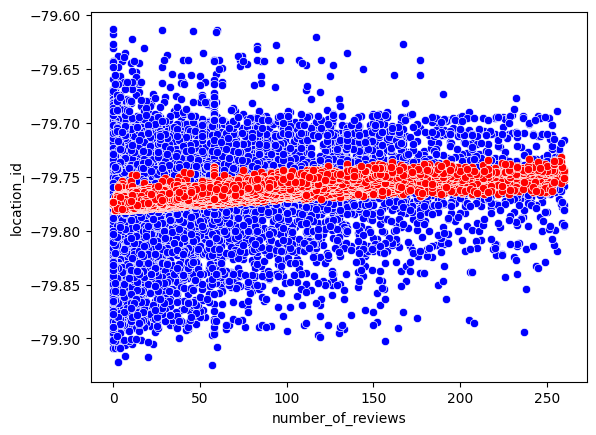

In [59]:
#Visualizamos la gráfica comparativa entre el id con number of reviews y el predicido

sns.scatterplot(x='number_of_reviews', y='location_id', color="blue", data=f1)
sns.scatterplot(x='number_of_reviews', y='Pred_id', color="red", data=f1)

<Axes: xlabel='host_is_superhost', ylabel='host_acceptance_rate'>

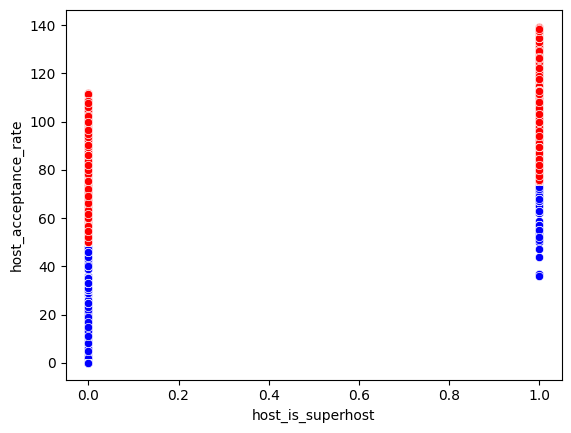

In [60]:
#Visualizamos la gráfica comparativa entre lo real y lo predecido para la variable con mayor correlación inicial

sns.scatterplot(x='host_is_superhost', y='host_acceptance_rate', color="blue", data=f1)
sns.scatterplot(x='host_is_superhost', y='Pred_hrr', color="red", data=f1)

<Axes: xlabel='number_of_reviews_ltm', ylabel='host_is_superhost'>

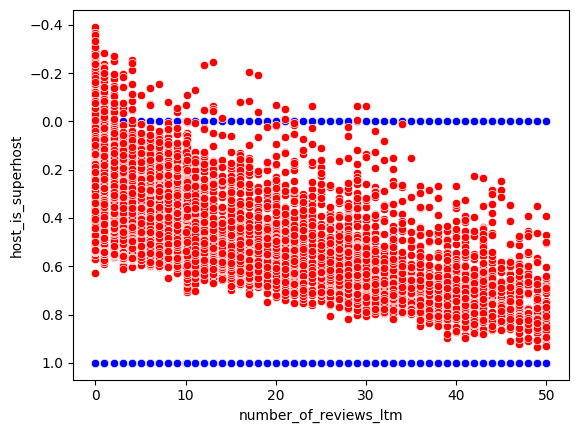

In [61]:
#Visualizamos la gráfica comparativa entre lo real y lo predecido para la variable con mayor correlación inicial

sns.scatterplot(x='number_of_reviews_ltm', y='host_is_superhost', color="blue", data=f1)
sns.scatterplot(x='number_of_reviews_ltm', y='Pred_his', color="red", data=f1)

<Axes: xlabel='room_type', ylabel='calculated_host_listings_count'>

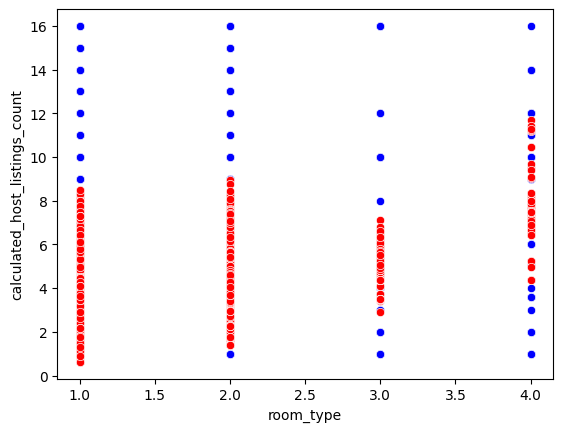

In [62]:
#Visualizamos la gráfica comparativa entre lo real y lo predecido para la variable con mayor correlación inicial

sns.scatterplot(x='room_type', y='calculated_host_listings_count', color="blue", data=f1)
sns.scatterplot(x='room_type', y='Pred_chl', color="red", data=f1)

<Axes: xlabel='calculated_host_listings_count_entire_homes', ylabel='room_type'>

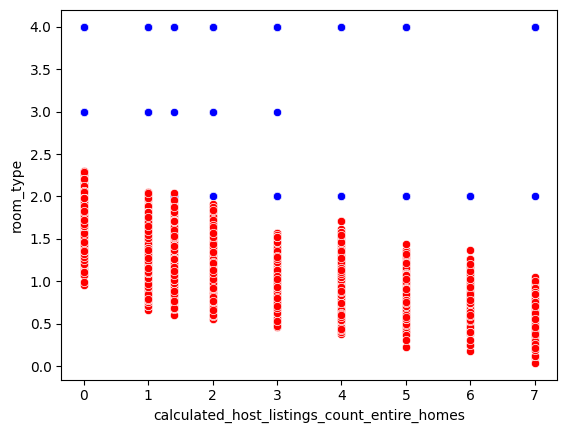

In [63]:
#Visualizamos la gráfica comparativa entre lo real y lo predecido para la variable con mayor correlación inicial

sns.scatterplot(x='calculated_host_listings_count_entire_homes', y='room_type', color="blue", data=f1)
sns.scatterplot(x='calculated_host_listings_count_entire_homes', y='Pred_room', color="red", data=f1)

<Axes: xlabel='bedrooms', ylabel='accommodates'>

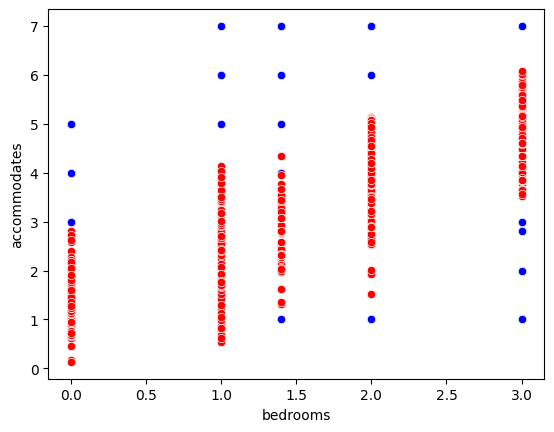

In [64]:
#Visualizamos la gráfica comparativa entre lo real y lo predecido para la variable con mayor correlación inicial

sns.scatterplot(x='bedrooms', y='accommodates', color="blue", data=f1)
sns.scatterplot(x='bedrooms', y='Pred_accommodates', color="red", data=f1)

<Axes: xlabel='accommodates', ylabel='bedrooms'>

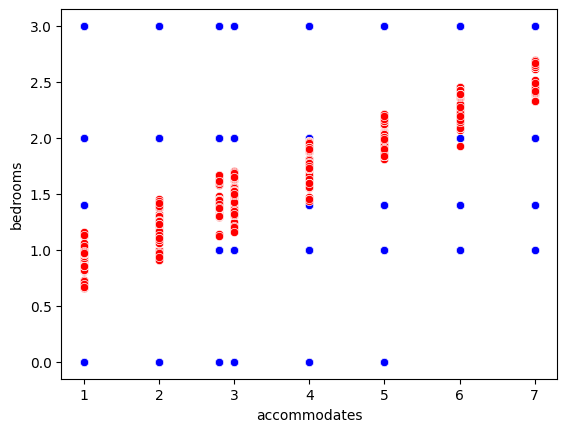

In [65]:
#Visualizamos la gráfica comparativa entre lo real y lo predecido para la variable con mayor correlación inicial

sns.scatterplot(x='accommodates', y='bedrooms', color="blue", data=f1)
sns.scatterplot(x='accommodates', y='Pred_bedrooms', color="red", data=f1)

<Axes: xlabel='accommodates', ylabel='price'>

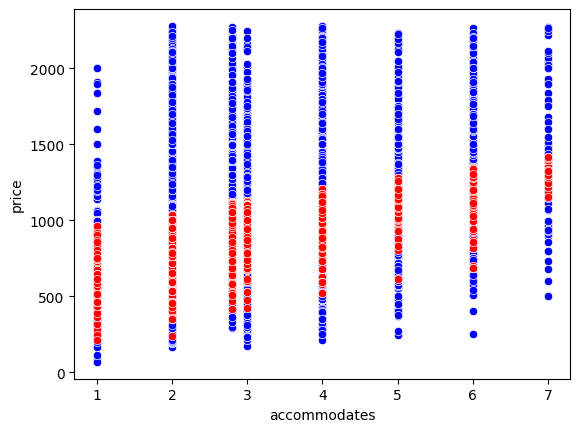

In [66]:
#Visualizamos la gráfica comparativa entre lo real y lo predecido para la variable con mayor correlación inicial

sns.scatterplot(x='accommodates', y='price', color="blue", data=f1)
sns.scatterplot(x='accommodates', y='Pred_price', color="red", data=f1)

<Axes: xlabel='review_scores_rating', ylabel='review_scores_value'>

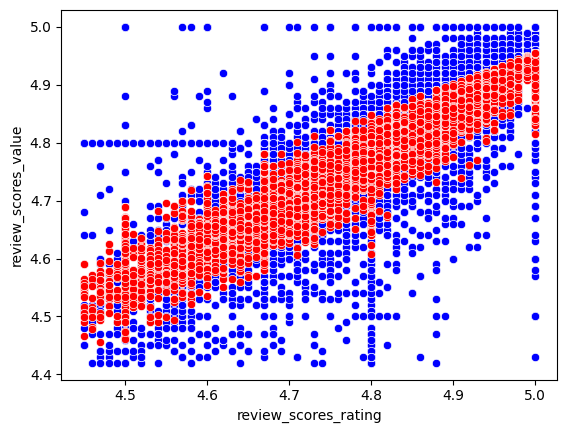

In [67]:
#Visualizamos la gráfica comparativa entre lo real y lo predecido para la variable con mayor correlación inicial

sns.scatterplot(x='review_scores_rating', y='review_scores_value', color="blue", data=f1)
sns.scatterplot(x='review_scores_rating', y='Pred_rsv', color="red", data=f1)

<Axes: xlabel='number_of_reviews_ltm', ylabel='reviews_per_month'>

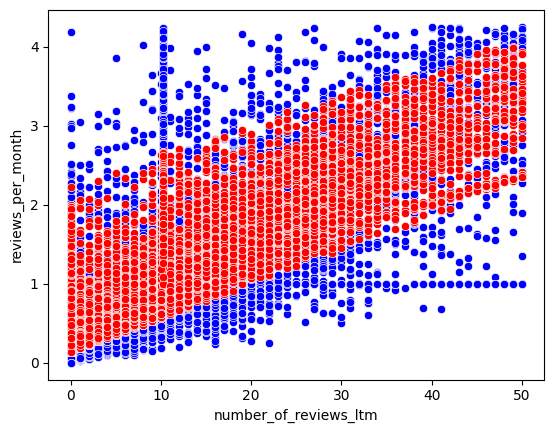

In [68]:
#Visualizamos la gráfica comparativa entre lo real y lo predecido para la variable con mayor correlación inicial

sns.scatterplot(x='number_of_reviews_ltm', y='reviews_per_month', color="blue", data=f1)
sns.scatterplot(x='number_of_reviews_ltm', y='Pred_rpm', color="red", data=f1)

**DETERMINAMOS COEFICIENTES DE DETERMINACIÓN**

In [69]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.04244738657293179

In [70]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter2=model2.score(X=Vars_Indep2, y=Var_Dep2)
coef_Deter2

0.29538598928634674

In [71]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter3=model3.score(X=Vars_Indep3, y=Var_Dep3)
coef_Deter3

0.2896190685469403

In [72]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter4=model4.score(X=Vars_Indep4, y=Var_Dep4)
coef_Deter4

0.18222690583474943

In [73]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter5=model5.score(X=Vars_Indep5, y=Var_Dep5)
coef_Deter5

0.40254569007913066

In [74]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter6=model6.score(X=Vars_Indep6, y=Var_Dep6)
coef_Deter6

0.5817868369489554

In [75]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter7=model7.score(X=Vars_Indep7, y=Var_Dep7)
coef_Deter7

0.45743682047774903

In [76]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter8=model8.score(X=Vars_Indep8, y=Var_Dep8)
coef_Deter8

0.2117602012031291

In [77]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter9=model9.score(X=Vars_Indep9, y=Var_Dep9)
coef_Deter9

0.5799650030134809

In [78]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter10=model10.score(X=Vars_Indep10, y=Var_Dep10)
coef_Deter10

0.7306792337573074

**COEFICIENTES DE CORRELACION**

In [79]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.2060276354592553)

In [80]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl2=np.sqrt(coef_Deter2)
coef_Correl2

np.float64(0.5434942403433055)

In [81]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl3=np.sqrt(coef_Deter3)
coef_Correl3

np.float64(0.5381626785154655)

In [82]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl4=np.sqrt(coef_Deter4)
coef_Correl4

np.float64(0.4268804350573465)

In [83]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl5=np.sqrt(coef_Deter5)
coef_Correl5

np.float64(0.6344648848274668)

In [84]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl6=np.sqrt(coef_Deter6)
coef_Correl6

np.float64(0.7627495243846143)

In [85]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl7=np.sqrt(coef_Deter7)
coef_Correl7

np.float64(0.6763407576641741)

In [86]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl8=np.sqrt(coef_Deter8)
coef_Correl8

np.float64(0.46017409879645454)

In [87]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl9=np.sqrt(coef_Deter9)
coef_Correl9

np.float64(0.7615543335924764)

In [88]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl10=np.sqrt(coef_Deter10)
coef_Correl10

np.float64(0.854797773603387)